In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
traindata = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
testdata = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv') 

testdata['SalePrice'] = np.NaN
raw_data = pd.concat([traindata,testdata])
raw_data = raw_data.drop('Id', axis = 1)
raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [3]:
raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [4]:
raw_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [5]:
raw_data.shape

(2919, 80)

**To understand data more clearly, read data_description.txt**

In [6]:
#Checking null values

pd.set_option('display.max_rows', 82)
raw_data.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

# Data Cleaning

In [7]:
#percentage of null values
percent_missing = raw_data.isnull().sum() * 100 / len(raw_data)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
MSSubClass,0.000000
MSZoning,0.137033
LotFrontage,16.649538
LotArea,0.000000
Street,0.000000
Alley,93.216855
LotShape,0.000000
LandContour,0.000000
Utilities,0.068517
LotConfig,0.000000


In [8]:
# dropping columns with null values > 90 %

data = raw_data.drop(['Alley', 'MiscFeature', 'PoolQC'], axis = 1)

In [9]:
#data.drop_duplicates(inplace = True)
data.shape

(2919, 77)

In [10]:
# Checking data types
data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object
HeatingQC         object
CentralAir        object


In [11]:
cols = [i for i in data.columns ]
cols.remove('SalePrice')

In [12]:
#Filling missing values with mean for numerical data

for i in data[cols] :
    if data[i].isnull().sum()>0:
        if(data[i].dtype == 'int64' or data[i].dtype == 'float64'):
            data[i].fillna(data[i].median(), inplace = True)

In [13]:
#Numerical columns and categorical columns

num_cols = data.select_dtypes(['int64', 'float64']).columns
cat_cols = data.select_dtypes(['object']).columns

data[cat_cols].isnull().sum()

MSZoning            4
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
Fence            2348
SaleType            1
SaleCondition       0
dtype: int64

In [14]:
#filling missing values for categorical columns with the most used values

data[['MSZoning','Exterior1st', 'Exterior2nd' ,'MasVnrType','Functional', 'Utilities','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','Electrical', 'BsmtFinType2','KitchenQual', 'FireplaceQu','GarageType', 'GarageFinish','GarageQual','GarageCond','Fence', 'SaleType']].describe()

,MSZoning,Exterior1st,Exterior2nd,MasVnrType,Functional,Utilities,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,Electrical,BsmtFinType2,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,Fence,SaleType
count,2915,2918,2918,2895,2917,2917,2838,2837,2837,2840,2918,2839,2918,1499,2762,2760,2760,2760,571,2918
unique,5,15,16,4,7,2,4,4,4,6,5,6,4,5,6,3,5,5,4,9
top,RL,VinylSd,VinylSd,None,Typ,AllPub,TA,TA,No,Unf,SBrkr,Unf,TA,Gd,Attchd,Unf,TA,TA,MnPrv,WD
freq,2265,1025,1014,1742,2717,2916,1283,2606,1904,851,2671,2493,1492,744,1723,1230,2604,2654,329,2525


In [15]:
data.shape

(2919, 77)

In [16]:
data['MSZoning'].fillna('RL', inplace = True)
data['Utilities'].fillna('AllPub', inplace = True)
data['BsmtQual'].fillna('TA', inplace = True)
data['BsmtCond'].fillna('TA', inplace = True)
data['BsmtExposure'].fillna('No', inplace = True)
data['BsmtFinType1'].fillna('Unf', inplace = True)
data['BsmtFinType2'].fillna('Unf', inplace = True)
data['Electrical'].fillna('SBrkr', inplace = True)
data['FireplaceQu'].fillna('Gd', inplace = True)
data['GarageType'].fillna('Attchd', inplace = True)
data['GarageFinish'].fillna('Unf', inplace = True)
data['GarageQual'].fillna('TA', inplace = True)
data['GarageCond'].fillna('TA', inplace = True)
data['Fence'].fillna('MnPrv', inplace = True)
data['KitchenQual'].fillna('TA', inplace = True)
data['SaleType'].fillna('WD', inplace = True)
data['Exterior1st'].fillna('VinlSd', inplace = True)
data['Exterior2nd'].fillna('VinlSd', inplace = True)
data['Functional'].fillna('Typ', inplace = True)
data['MasVnrType'].fillna('None', inplace = True)
data[cat_cols].isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
Fence            0
SaleType         0
SaleCondition    0
dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

**Distribution of numerical features**

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>],
       [<AxesSubplot:title={'center':'Ful

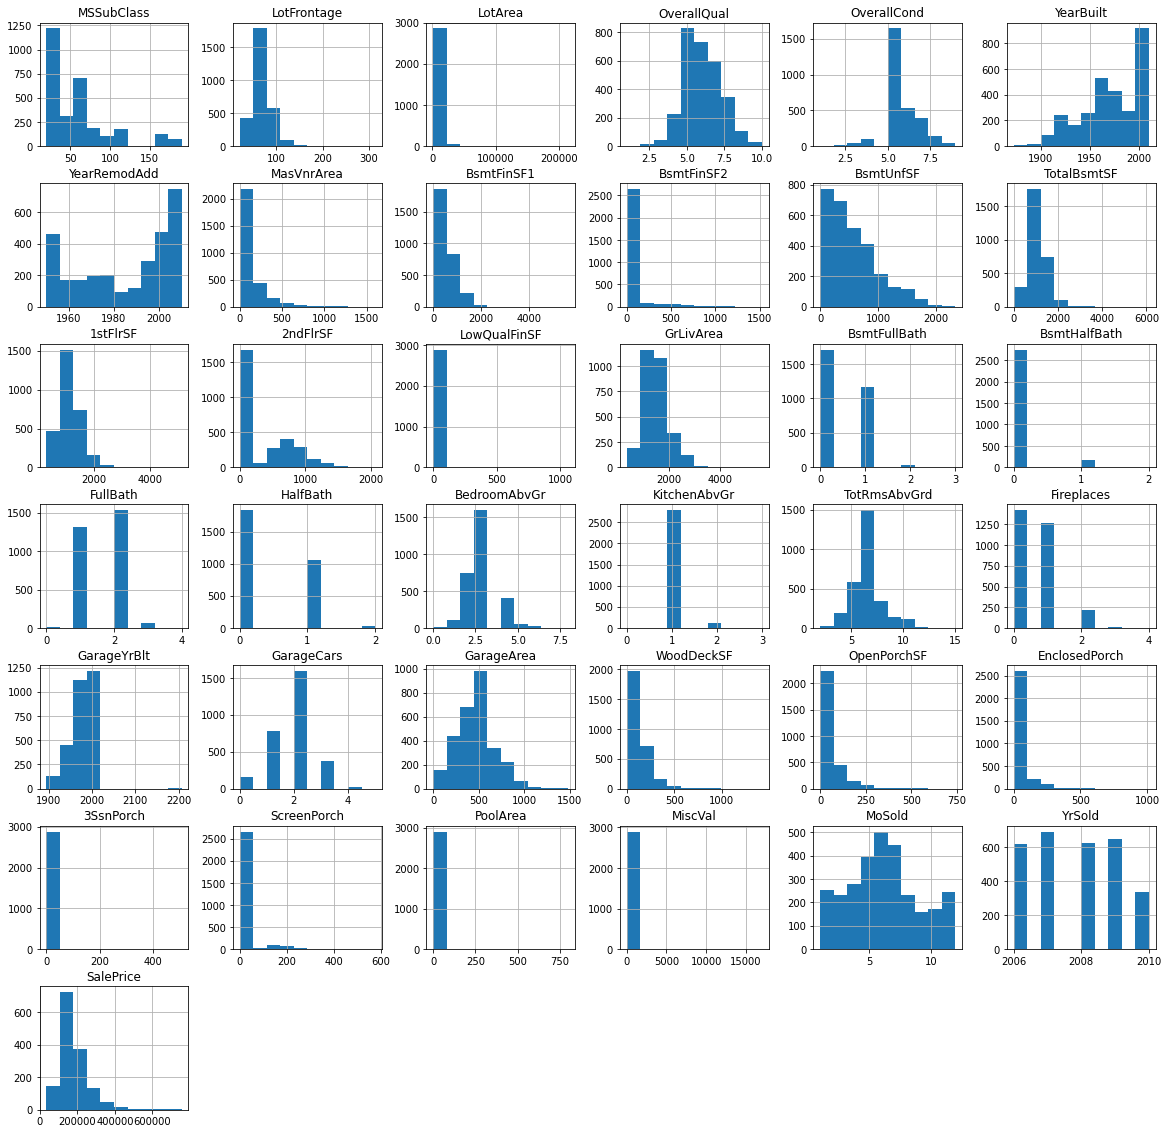

In [18]:
data.hist(figsize = (20,20))

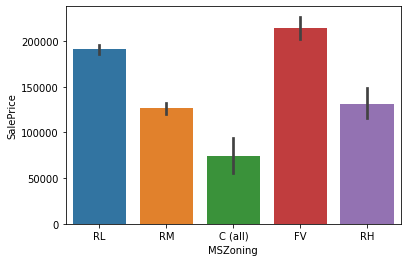

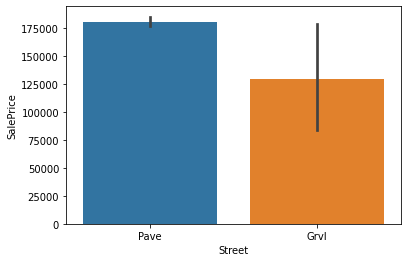

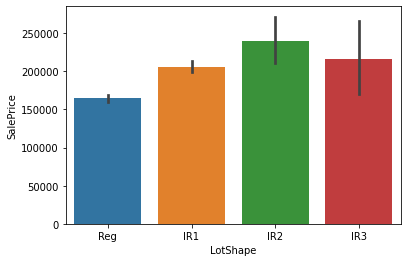

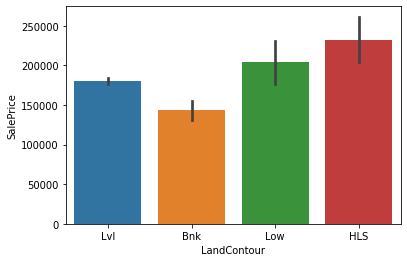

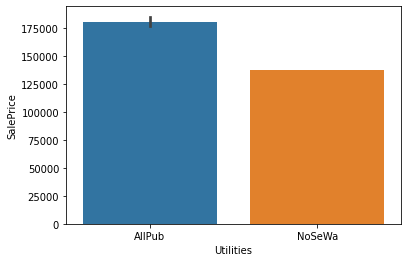

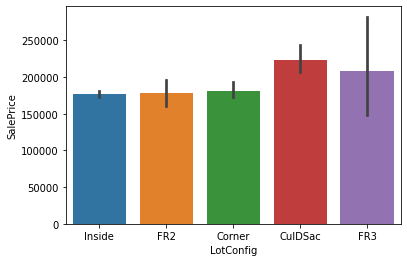

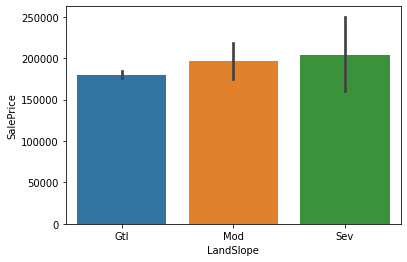

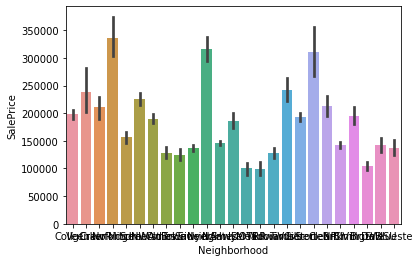

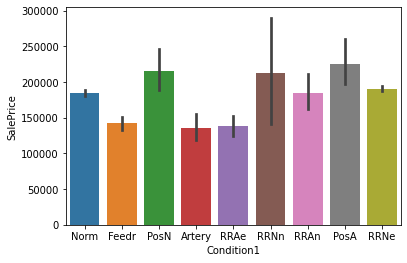

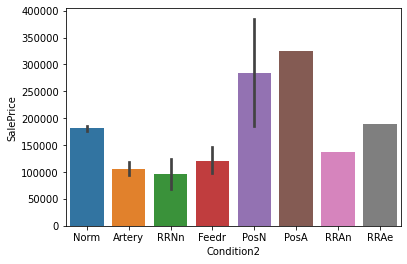

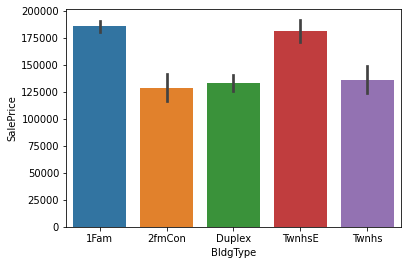

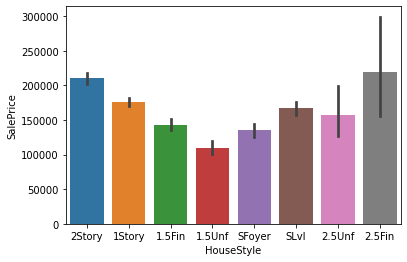

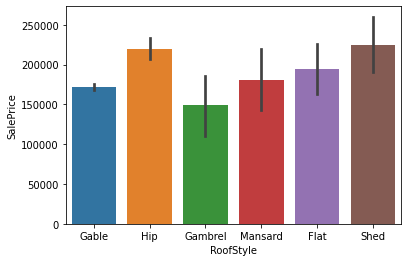

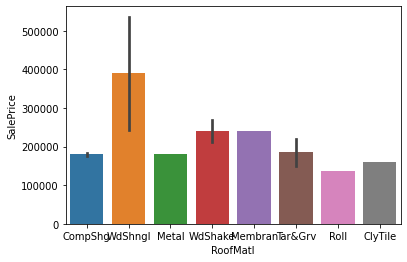

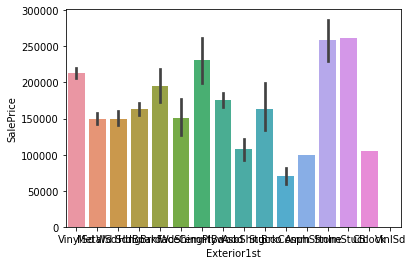

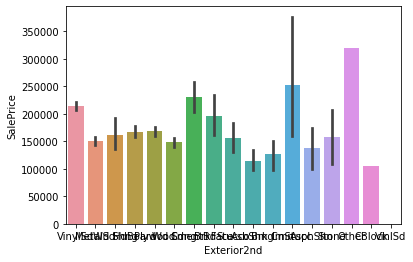

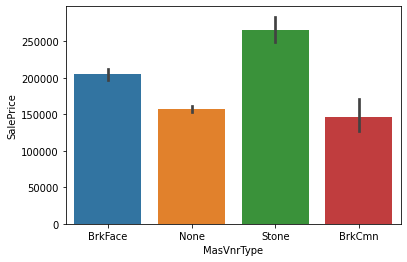

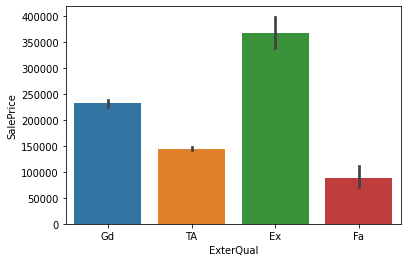

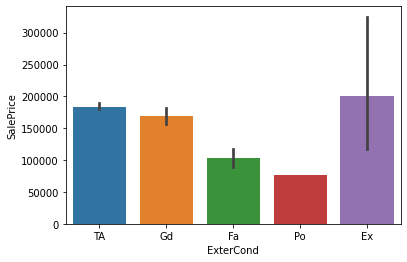

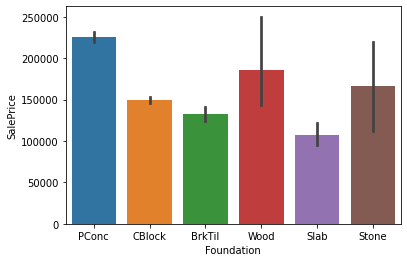

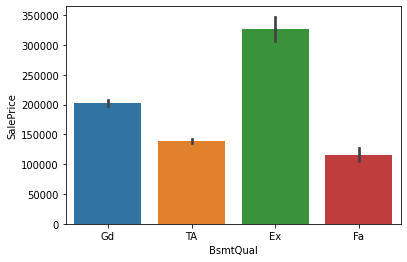

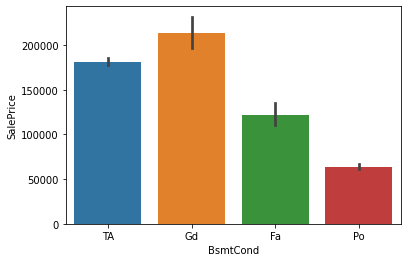

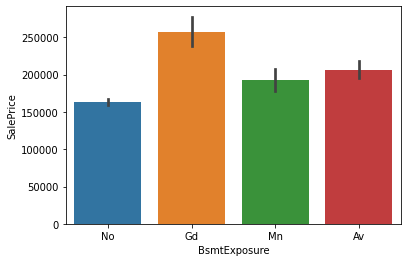

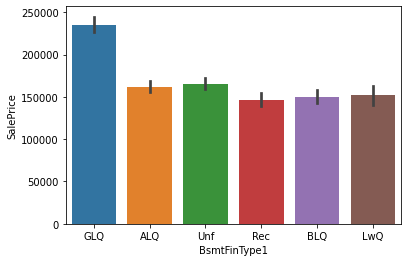

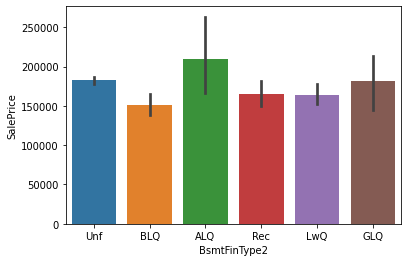

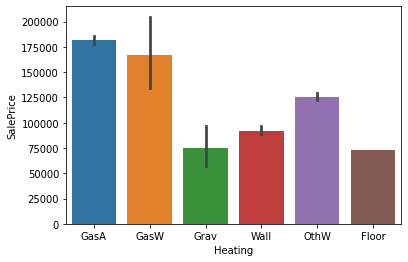

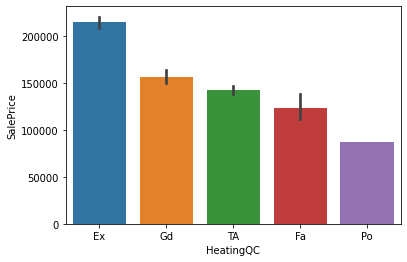

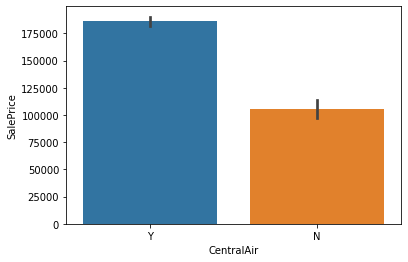

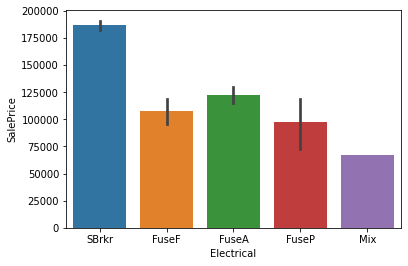

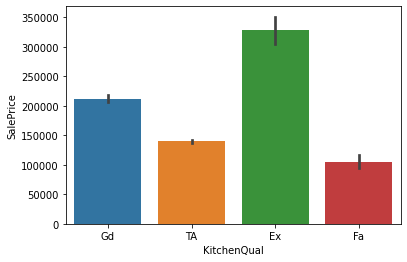

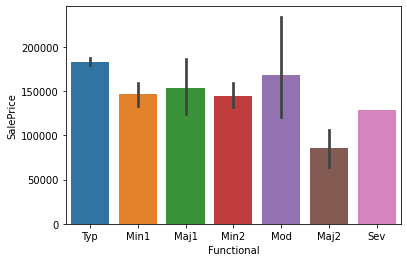

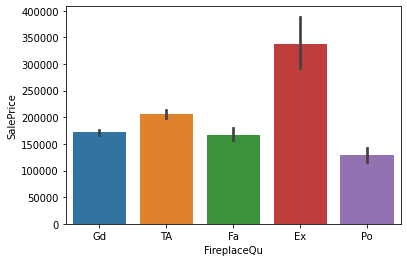

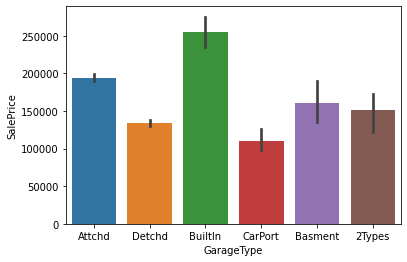

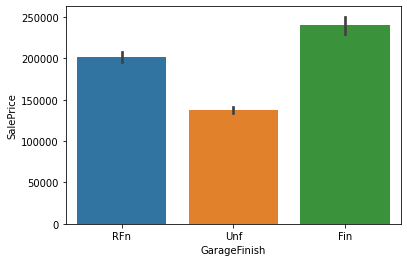

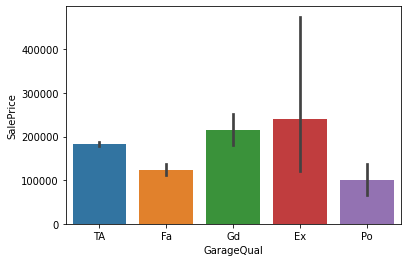

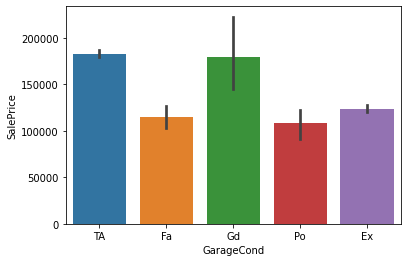

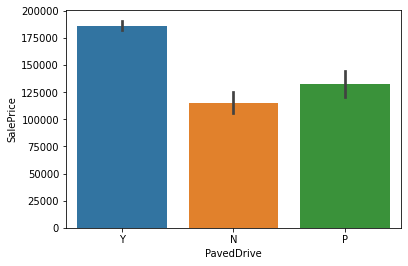

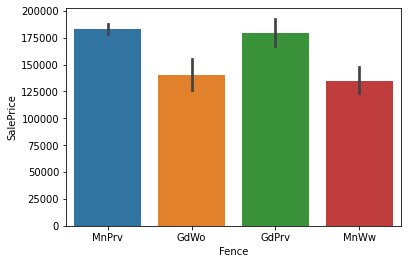

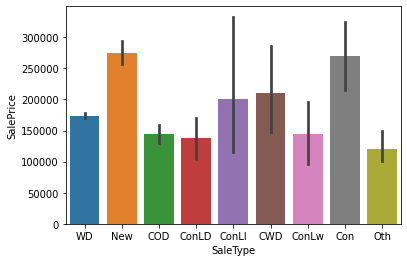

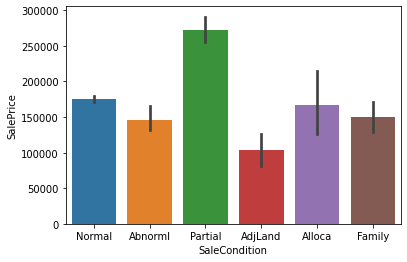

In [19]:
for i in cat_cols:
    sns.barplot(x = i, y = 'SalePrice', data = data)
    plt.show()

# Feature Engineering

In [20]:
data.MSSubClass.unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40, 150])

In [21]:
#Classifying Subclass into more general groups

def values(x):
    if x>=20 and x<=55 or x == 120 or x == 150:
        return '1'
    elif x>=60 and x<= 75 or x ==160 or x==190:
        return '2'
    else:
        return 'other'
    
data['MSClass'] = data['MSSubClass'].apply(values)
data['MSClass'].dtype

dtype('O')

In [22]:
data['OverallCond'] = data['OverallCond'].astype('object')
data['OverallQual'] = data['OverallQual'].astype('object')

LivLotRatio: the ratio of GrLivArea to LotArea

Spaciousness: the sum of 1stFlrSF and 2ndFlrSF divided by TotRmsAbvGrd

TotalOutsideSF: the sum of WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, and ScreenPorch

In [23]:
data['TotalOutsideSF'] = data['WoodDeckSF'] + data['OpenPorchSF'] + data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch'] 


In [24]:
data["Spaciousness"] = (data['1stFlrSF'] + data['2ndFlrSF']) / data['TotRmsAbvGrd']

In [25]:
data["LivLotRatio"] = data['GrLivArea'] / data['LotArea']

In [26]:
# PorchTypes that counts how many of the following are greater than 0.0:
data["PorchTypes"] = data[['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',  'ScreenPorch']].gt(0.0).sum(axis=1)

In [27]:
# an interaction between BldgType and GrLivArea 

# One-hot encode BldgType. Using`prefix="Bldg"
data_one = pd.get_dummies(data.BldgType, prefix = 'Bldg') 
# Multiply
data_one = data_one.mul(data.GrLivArea, axis = 0)

data_one

,Bldg_1Fam,Bldg_2fmCon,Bldg_Duplex,Bldg_Twnhs,Bldg_TwnhsE
0,1710,0,0,0,0
1,1262,0,0,0,0
2,1786,0,0,0,0
3,1717,0,0,0,0
4,2198,0,0,0,0
...,...,...,...,...,...
1454,0,0,0,1092,0
1455,0,0,0,0,1092
1456,1224,0,0,0,0
1457,970,0,0,0,0


In [28]:
data['Bldg_1Fam']  = data_one['Bldg_1Fam'] 
data['Bldg_2fmCon'] = data_one['Bldg_2fmCon']
data['Bldg_Duplex'] = data_one['Bldg_Duplex']
data['Bldg_Twnhs'] = data_one['Bldg_Twnhs']
data['Bldg_TwnhsE'] = data_one['Bldg_TwnhsE']

**MedNhbdArea that describes the median of GrLivArea grouped on Neighborhood.
The value of a home often depends on how it compares to typical homes in its neighborhood**

In [29]:
data["MedNhbdArea"] = data.groupby('Neighborhood')['GrLivArea'].transform('median')

In [30]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,TotalOutsideSF,Spaciousness,LivLotRatio,PorchTypes,Bldg_1Fam,Bldg_2fmCon,Bldg_Duplex,Bldg_Twnhs,Bldg_TwnhsE,MedNhbdArea
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,213.750000,0.202367,1,1710,0,0,0,0,1504.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,298,210.333333,0.131458,1,1262,0,0,0,0,1706.5
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,297.666667,0.158756,1,1786,0,0,0,0,1504.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,307,245.285714,0.179791,2,1717,0,0,0,0,1648.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,276,244.222222,0.154137,2,2198,0,0,0,0,2418.0


**ENCODING with LABEL ENCODER**

In [31]:
cat_cols=data.select_dtypes('object').columns
num_cols=data.select_dtypes(['int64', 'float64']).columns

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

**Separating train and test data**

In [33]:
train = data[data.SalePrice.notna()]
test = data[data.SalePrice.isna()]

train.drop_duplicates(inplace = True)
test.drop_duplicates(inplace = True)
train.shape
test.shape

(1459, 88)

In [34]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


from sklearn.model_selection import train_test_split

X = train
y = train.pop('SalePrice')
x_train, x_valid, y_train, y_valid = train_test_split(X, y ,test_size = 0.15, random_state = 67 )


In [35]:
print(y)
X.columns

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [36]:
from xgboost import XGBRegressor
model = XGBRegressor(learning_rate = 0.095, n_estimators = 100)


model.fit(x_train, y_train)

# Preprocessing of validation data, get predictions
preds =  model.predict(x_valid)


# Evaluate the model
from sklearn.metrics import explained_variance_score
acc_training = explained_variance_score(model.predict(x_train), y_train)
acc = explained_variance_score(preds, y_valid)
print("Training acc :",acc_training)
print ("Validation acc :",acc)

Training acc : 0.9954921818109259
Validation acc : 0.888183219440228


In [37]:

from sklearn.model_selection import cross_val_score

def score_dataset(X, y, model=XGBRegressor(learning_rate = 0.095, n_estimators = 100)):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

In [38]:
score_dataset(X, y)

0.13015899512392054

In [39]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(preds, y_valid)
print('MAE:', score)

MAE: 16129.495897545663


Text(0, 0.5, 'Predicted')

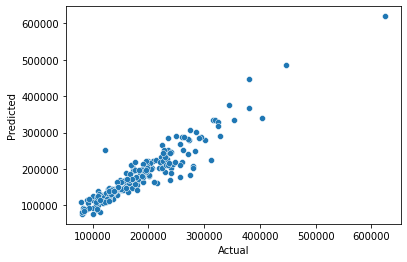

In [40]:
sns.scatterplot(y_valid, preds)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [41]:
test.drop('SalePrice', axis = 1, inplace = True)
test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [42]:
preds_test = model.predict(test)

In [43]:

output = pd.DataFrame({'Id': pd.Series(np.arange(1461,2920,1)),
                       'SalePrice': preds_test})


In [44]:
pd.Series(np.arange(1461,2920,1))

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Length: 1459, dtype: int64

In [45]:
output.to_csv('submission.csv', index=False)

In [46]:
output

,Id,SalePrice
0,1461,127792.234375
1,1462,151034.437500
2,1463,193185.718750
3,1464,188510.578125
4,1465,185247.390625
...,...,...
1454,2915,81186.601562
1455,2916,85361.757812
1456,2917,164111.390625
1457,2918,118638.664062


In [47]:
sample = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659
